<br>

# Crop Simulation

<hr>
<hr>

## Importing Libraries

In [1]:
'''import supporting libraries'''

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
from google.colab import drive

In [ ]:
'''connecting to google drive'''

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''setting working directory'''

os.chdir("drive/My Drive/C_PyAEZ_M2_Crop_Simulation/data/") # change this based on your location in google drive

In [ ]:
'''add path to source code directory'''

sys.path.append('./code/')

In [ ]:
'''importing library'''

import CropSimulation
aez = CropSimulation.CropSimulation()

## Handling Data

In [ ]:
'''reading climate data'''

min_temp = np.load('./sample_data/input/climate/min_temp.npy') # Celcius
max_temp = np.load('./sample_data/input/climate/max_temp.npy') # Celcius
precipitation = np.load('./sample_data/input/climate/precipitation.npy') # mm / day
short_rad = np.load('./sample_data/input/climate/short_rad.npy') # W/m^2
wind_speed = np.load('./sample_data/input/climate/wind_speed.npy') # m/s
rel_humidity = np.load('./sample_data/input/climate/relative_humidity.npy') # Fraction, and assumed as a constant 0.70

In [ ]:
'''reading study area and elevation data'''

admin_mask = np.load('./sample_data/input/LAO_Admin.npy');
srtm_elevation = np.load('./sample_data/input/SRTM_Elevation.npy'); # m

In [ ]:
'''setting input data'''

aez.setMonthlyClimateData(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
aez.setLocationTerrainData(lat_min=13.90, lat_max=22.51, elevation=srtm_elevation)
aez.setStudyAreaMask(admin_mask=admin_mask, no_data_value=0)

## Setting Crop Parameters

In [ ]:
'''setting crop parameters'''

aez.setCropParameters(LAI=4, HI=0.4, legume=0, adaptability=2, cycle_len=105, D1=0.75, D2=0.75)
aez.setCropCycleParameters(stage_per=[10, 30, 30, 30], kc=[1.1, 1.2, 1], kc_all=1.1, yloss_f=[1, 2, 2.5, 1], yloss_f_all=2)
aez.setSoilWaterParameters(Sa=100*np.ones((admin_mask.shape)), pc=0.5) 

In [ ]:
'''setting climate screening (optional)'''

aez.setLGPTScreening([75,75,75],[105,105,105])
aez.setTSumScreening([2000,2000,2000],[3000,3000,3000])

In [ ]:
'''run simulations'''

aez.simulateCropCycle() # results are in kg / hectare

Done: 0 %
Done: 0 %
Done: 0 %
Done: 1 %
Done: 2 %
Done: 3 %
Done: 5 %
Done: 7 %
Done: 10 %
Done: 15 %
Done: 20 %
Done: 25 %
Done: 30 %
Done: 34 %
Done: 39 %
Done: 42 %
Done: 45 %
Done: 48 %
Done: 52 %
Done: 57 %
Done: 61 %
Done: 64 %
Done: 66 %
Done: 68 %
Done: 69 %
Done: 71 %
Done: 73 %
Done: 74 %
Done: 76 %
Done: 79 %
Done: 81 %
Done: 84 %
Done: 85 %
Done: 87 %
Done: 90 %
Done: 92 %
Done: 95 %
Done: 97 %
Done: 98 %
Done: 99 %
Simulations Completed !


In [ ]:
'''get result'''

yield_map_rain = aez.getEstimatedYieldRainfed()
yield_map_irr = aez.getEstimatedYieldIrrigated()

starting_date = aez.getOptimumCycleStartDate()

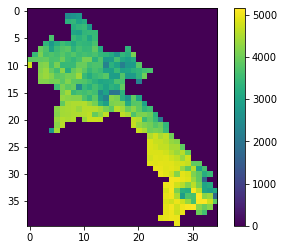

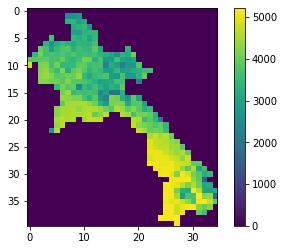

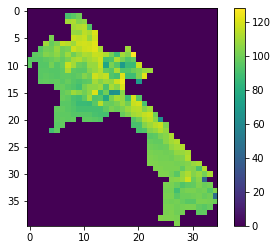

In [ ]:
'''visualize result'''

plt.imshow(yield_map_rain)
plt.colorbar()
plt.show()
plt.imshow(yield_map_irr)
plt.colorbar()
plt.show()

plt.imshow(starting_date)
plt.colorbar()
plt.show()